## The Problem
Airbnb is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 
It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.


## Data Description:
Id: Serial no.
price: price per night
host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)
host_total_listings_count:how many listings the host is responsible for in total.
host_identity_verified: t- True, the host identity is verified, 
                        f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)
latitude: geographical location of the place with respect to latitude.
longitude: geographical location of the place with respect to longitute.
property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)
room_type: Type of room (e.g. sharing, private, entire house etc)
accommodates: total no. of people the property can accommodate.
bathrooms: no. of bathrooms.
bedrooms: no. of bedrooms
beds:no. of beds. 
security_deposit: security deposit amount.
cleaning_fee: fee charged for cleaning.
extra_people: extra people charges.
minimum_nights: duration of stay minimum nights. 
maximum_nights: duration of stay maximum nights.
number_of_reviews: total no. of reviews.
(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)
instant_bookable: t-True booking can be done instantly,
                  f-False booking cannot be done instantly.
is_business_travel_ready: is it ready for stay related to business purpose.
cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)
reviews_per_month: monthly review scores
    

In [3]:
import pandas as pd     
import numpy as np

import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns           
colour=sns.color_palette()

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import os



In [6]:
air_df = pd.read_csv("train.csv")
air_df.shape

(1000, 30)

In [104]:
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [105]:
air_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1000 non-null   int64  
 1   price                        1000 non-null   int64  
 2   host_is_superhost            998 non-null    object 
 3   host_total_listings_count    998 non-null    float64
 4   host_identity_verified       998 non-null    object 
 5   latitude                     1000 non-null   float64
 6   longitude                    1000 non-null   float64
 7   property_type                1000 non-null   object 
 8   room_type                    1000 non-null   object 
 9   accommodates                 1000 non-null   int64  
 10  bathrooms                    997 non-null    float64
 11  bedrooms                     1000 non-null   int64  
 12  beds                         998 non-null    float64
 13  security_deposit   

In [106]:
air_df.describe()

,Id,price,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,997.000000,1000.000000,998.000000,574.000000,...,1000.000000,1000.000000,660.000000,658.000000,658.000000,656.000000,657.000000,656.000000,656.000000,689.000000
mean,499.500000,145.521000,7.044088,-33.866773,151.205647,2.988000,1.255266,1.406000,1.748497,395.393728,...,693.481000,9.592000,93.322727,9.537994,9.235562,9.730183,9.732116,9.637195,9.399390,1.203745
std,288.819436,91.428523,27.234486,0.068062,0.080778,1.681869,0.488096,0.797371,1.122342,466.069393,...,534.775022,21.134526,10.021393,0.942446,1.237718,0.800040,0.783648,0.732717,1.010902,1.466470
min,0.000000,18.000000,1.000000,-34.092546,150.651014,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,6.000000,2.000000,0.020000
25%,249.750000,75.000000,1.000000,-33.899661,151.182542,2.000000,1.000000,1.000000,1.000000,150.000000,...,30.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.190000
50%,499.500000,120.000000,1.000000,-33.884990,151.217358,2.000000,1.000000,1.000000,1.000000,300.000000,...,1125.000000,2.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.640000
75%,749.250000,195.750000,2.000000,-33.843008,151.261443,4.000000,1.500000,2.000000,2.000000,500.000000,...,1125.000000,7.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.680000
max,999.000000,449.000000,205.000000,-33.401800,151.338687,16.000000,4.000000,5.000000,9.000000,6000.000000,...,3000.000000,194.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.130000


In [107]:
air_df.describe(include=object)

,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,is_business_travel_ready,cancellation_policy
count,998,998,1000,1000,1000,1000,1000
unique,2,2,19,3,2,2,3
top,f,f,Apartment,Entire home/apt,f,f,strict
freq,905,509,651,589,693,976,392


## Data Preprocessing




<AxesSubplot:>

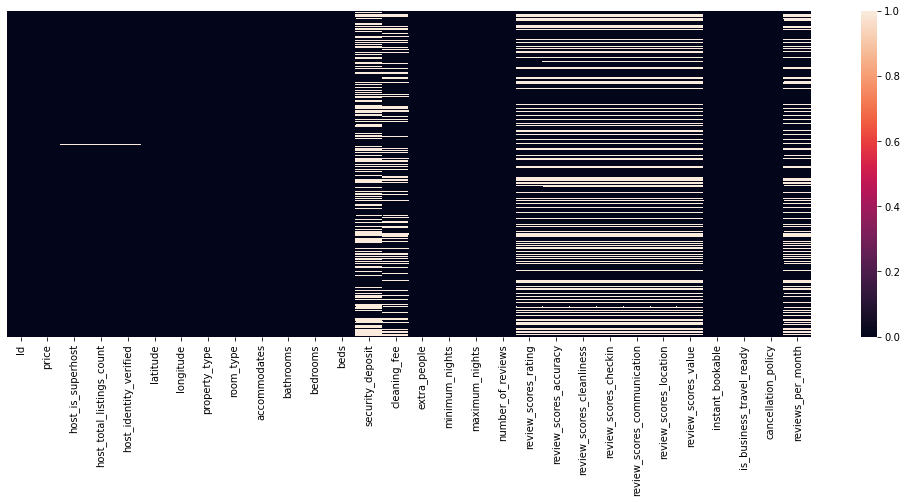

In [108]:
plt.figure(figsize=(18,6))
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns) 
#plt.xticks(rotation=60)

###  HeatMap is a representation of null and non-null values in the dataset. white represents a null and black - non-null

In [109]:
air_df.isnull().sum()

Id                               0
price                            0
host_is_superhost                2
host_total_listings_count        2
host_identity_verified           2
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        3
bedrooms                         0
beds                             2
security_deposit               426
cleaning_fee                   307
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           340
review_scores_accuracy         342
review_scores_cleanliness      342
review_scores_checkin          344
review_scores_communication    343
review_scores_location         344
review_scores_value            344
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy 

### Dealing with null values can often be straight forward, given we have the domain expertise. However, there are some most commonly used approaches based on the type of variable

Continous variable -  Impute(mean, median, mode, z-score avg), remove
Object/Categorical  variable -  Impute(mode, based on other fields), remove


In [110]:
#checking % of null values in each column of dataset.
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((null/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [111]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)


,columns,null_values,percentage_null_values
5,security_deposit,426,42.6
10,review_scores_checkin,344,34.4
12,review_scores_location,344,34.4
13,review_scores_value,344,34.4
11,review_scores_communication,343,34.3
8,review_scores_accuracy,342,34.2
9,review_scores_cleanliness,342,34.2
7,review_scores_rating,340,34.0
14,reviews_per_month,311,31.1
6,cleaning_fee,307,30.7


In [112]:
#imputing missing values for continuous variables, substituing those with mean


for num in air_df.select_dtypes(('float64','int64')):
    if air_df[num].isnull().sum()!=0:
        air_df[num] = air_df[num].fillna(air_df[num].mean())
    

In [113]:
#imputing the missing value of a categorical variables with most commonfor col in air_df.select_dtypes('object'):
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])



#### In some cases, the values of the variables fall in the extreme range, which will impact the model fitting in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5 IQR) and (Q3+1.5 IQR)

#### IQR- Inter-quartile range, Q1- first quartile Q3-third quartile

#### sometimes these values are random, but sometimes it is not random it adds certain information to the data. In this cases we cannot drop these outliers. We term them as business outliers.



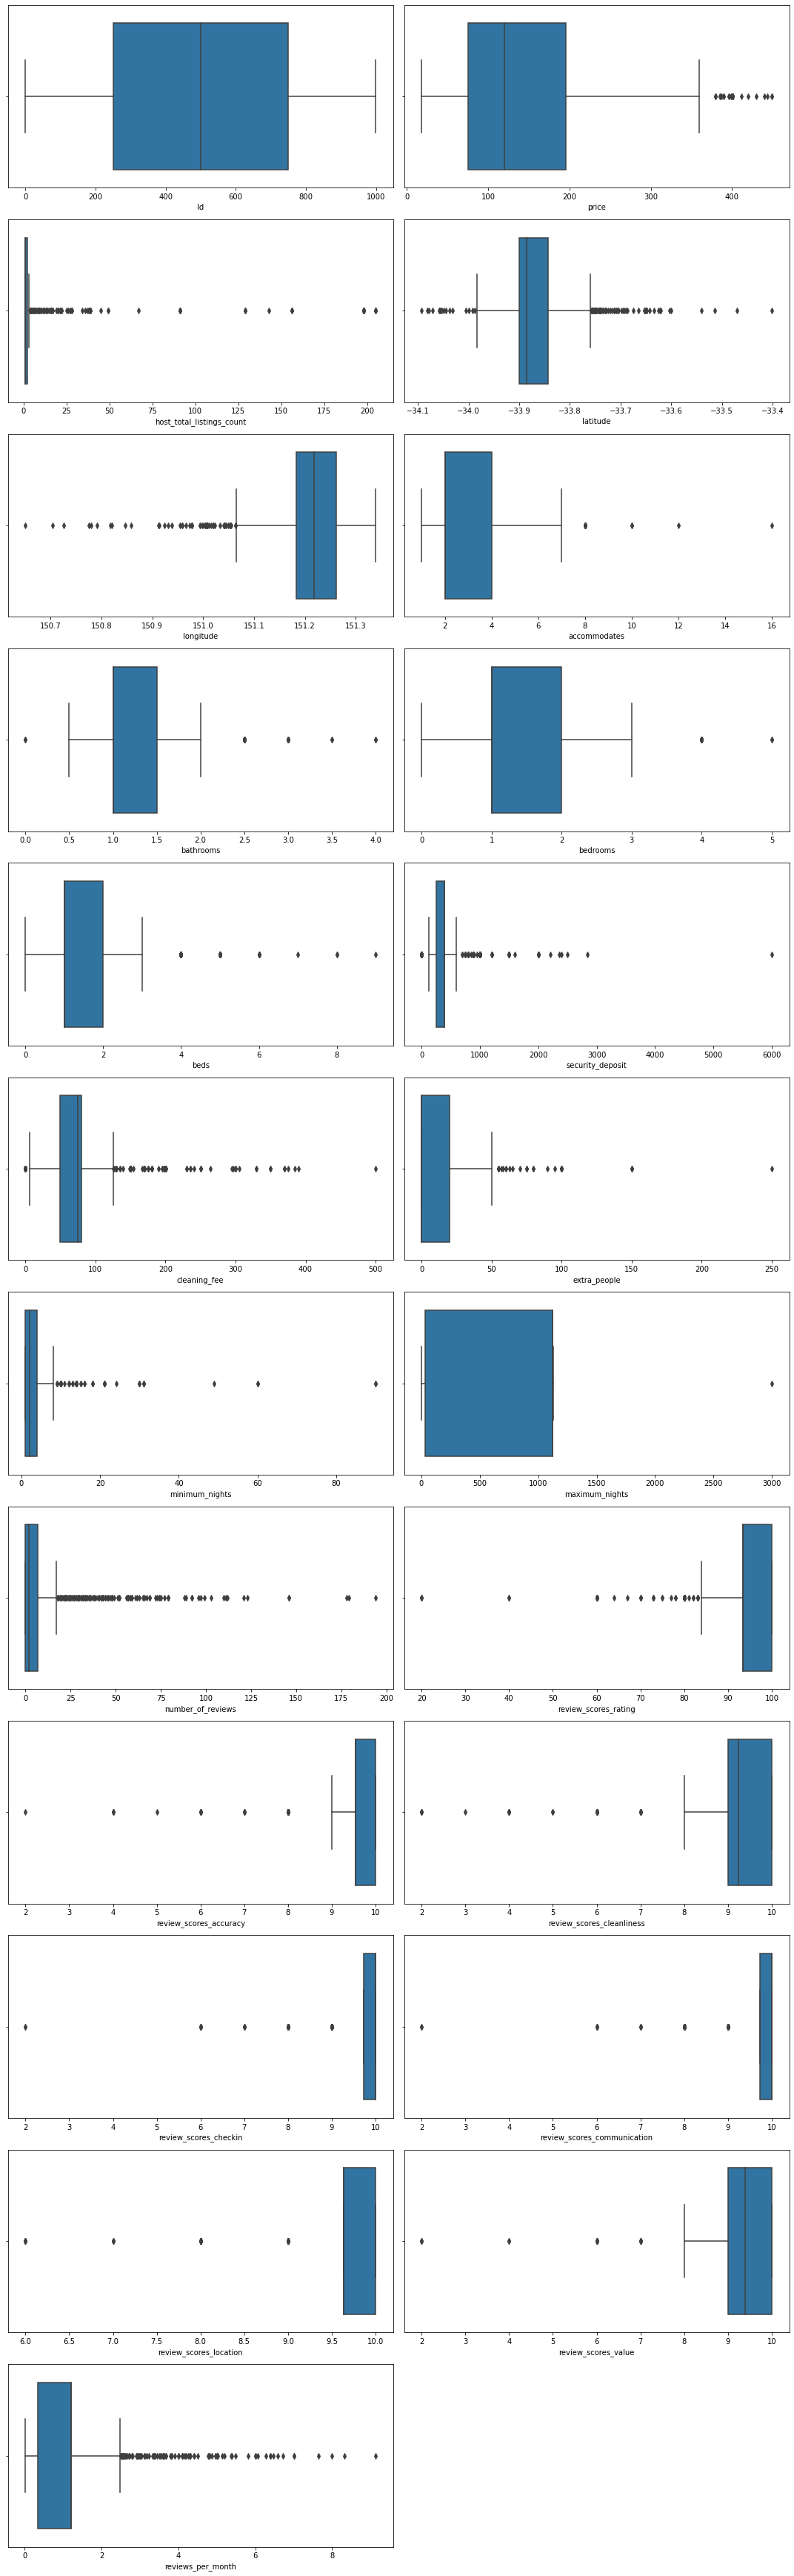

In [114]:
#we will plot boxplots to visualize outliers
plt.figure(figsize= (15,60))
n=1
for column in air_df.select_dtypes(('int64','float64')):
    plt.subplot(15,2,n)
    sns.boxplot(x= air_df[column])
    plt.tight_layout()
    n=n+1
plt.show()

In [115]:
air_df['accommodates'].quantile(0.25)


2.0

In [116]:
dict_outliers = dict()
for column in air_df.select_dtypes(('int64', 'float64')):
    q1 = air_df[column].quantile(0.25)
    q3 = air_df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_3 = 3*iqr
    lower_limit = q1 - iqr_3
    upper_limit = q3 + iqr_3
    dict_outliers[column] = len(air_df[(air_df[column]<lower_limit) | (air_df[column]>upper_limit)][column])

In [117]:
dict_outliers

{'Id': 0,
 'price': 0,
 'host_total_listings_count': 106,
 'latitude': 22,
 'longitude': 15,
 'accommodates': 2,
 'bathrooms': 4,
 'bedrooms': 0,
 'beds': 11,
 'security_deposit': 61,
 'cleaning_fee': 53,
 'extra_people': 12,
 'minimum_nights': 38,
 'maximum_nights': 0,
 'number_of_reviews': 106,
 'review_scores_rating': 24,
 'review_scores_accuracy': 65,
 'review_scores_cleanliness': 13,
 'review_scores_checkin': 43,
 'review_scores_communication': 45,
 'review_scores_location': 52,
 'review_scores_value': 5,
 'reviews_per_month': 49}

In [118]:
#Lets convert object types to category
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 


Id                                int64
price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                      int64
bathrooms                       float64
bedrooms                          int64
beds                            float64
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64


In [119]:
air_df[['accommodates','bedrooms','bathrooms','beds','extra_people', 'minimum_nights','maximum_nights', 'number_of_reviews']] = air_df[['accommodates','bedrooms','bathrooms','beds','extra_people', 'minimum_nights','maximum_nights', 'number_of_reviews']].astype('category')


In [120]:
air_df.head()


,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,strict,0.530000
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,...,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,f,f,flexible,1.203745
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.00000,f,f,moderate,2.380000
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,flexible,1.960000
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,moderate,2.730000


In [121]:
air_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Id                           1000 non-null   int64   
 1   price                        1000 non-null   int64   
 2   host_is_superhost            1000 non-null   category
 3   host_total_listings_count    1000 non-null   float64 
 4   host_identity_verified       1000 non-null   category
 5   latitude                     1000 non-null   float64 
 6   longitude                    1000 non-null   float64 
 7   property_type                1000 non-null   category
 8   room_type                    1000 non-null   category
 9   accommodates                 1000 non-null   category
 10  bathrooms                    1000 non-null   category
 11  bedrooms                     1000 non-null   category
 12  beds                         1000 non-null   category
 13  secu

## Exploratory Data Analysis


Text(0, 0.5, 'Frequency')

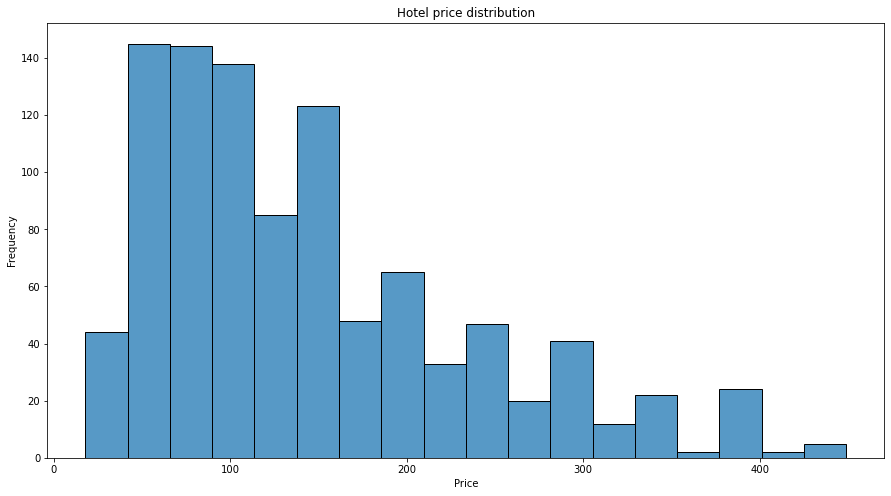

In [122]:
#we will plot a graph to check price variations.
plt.figure(figsize=(15,8))
sns.histplot(air_df['price'])
plt.title('Hotel price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')


#from below graph we can say that night prices are right skewed, 
#this means that the mean will be higher than the mode. night prices of most hosts are between 50 to 200.

C:\Users\Turvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Turvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Turvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

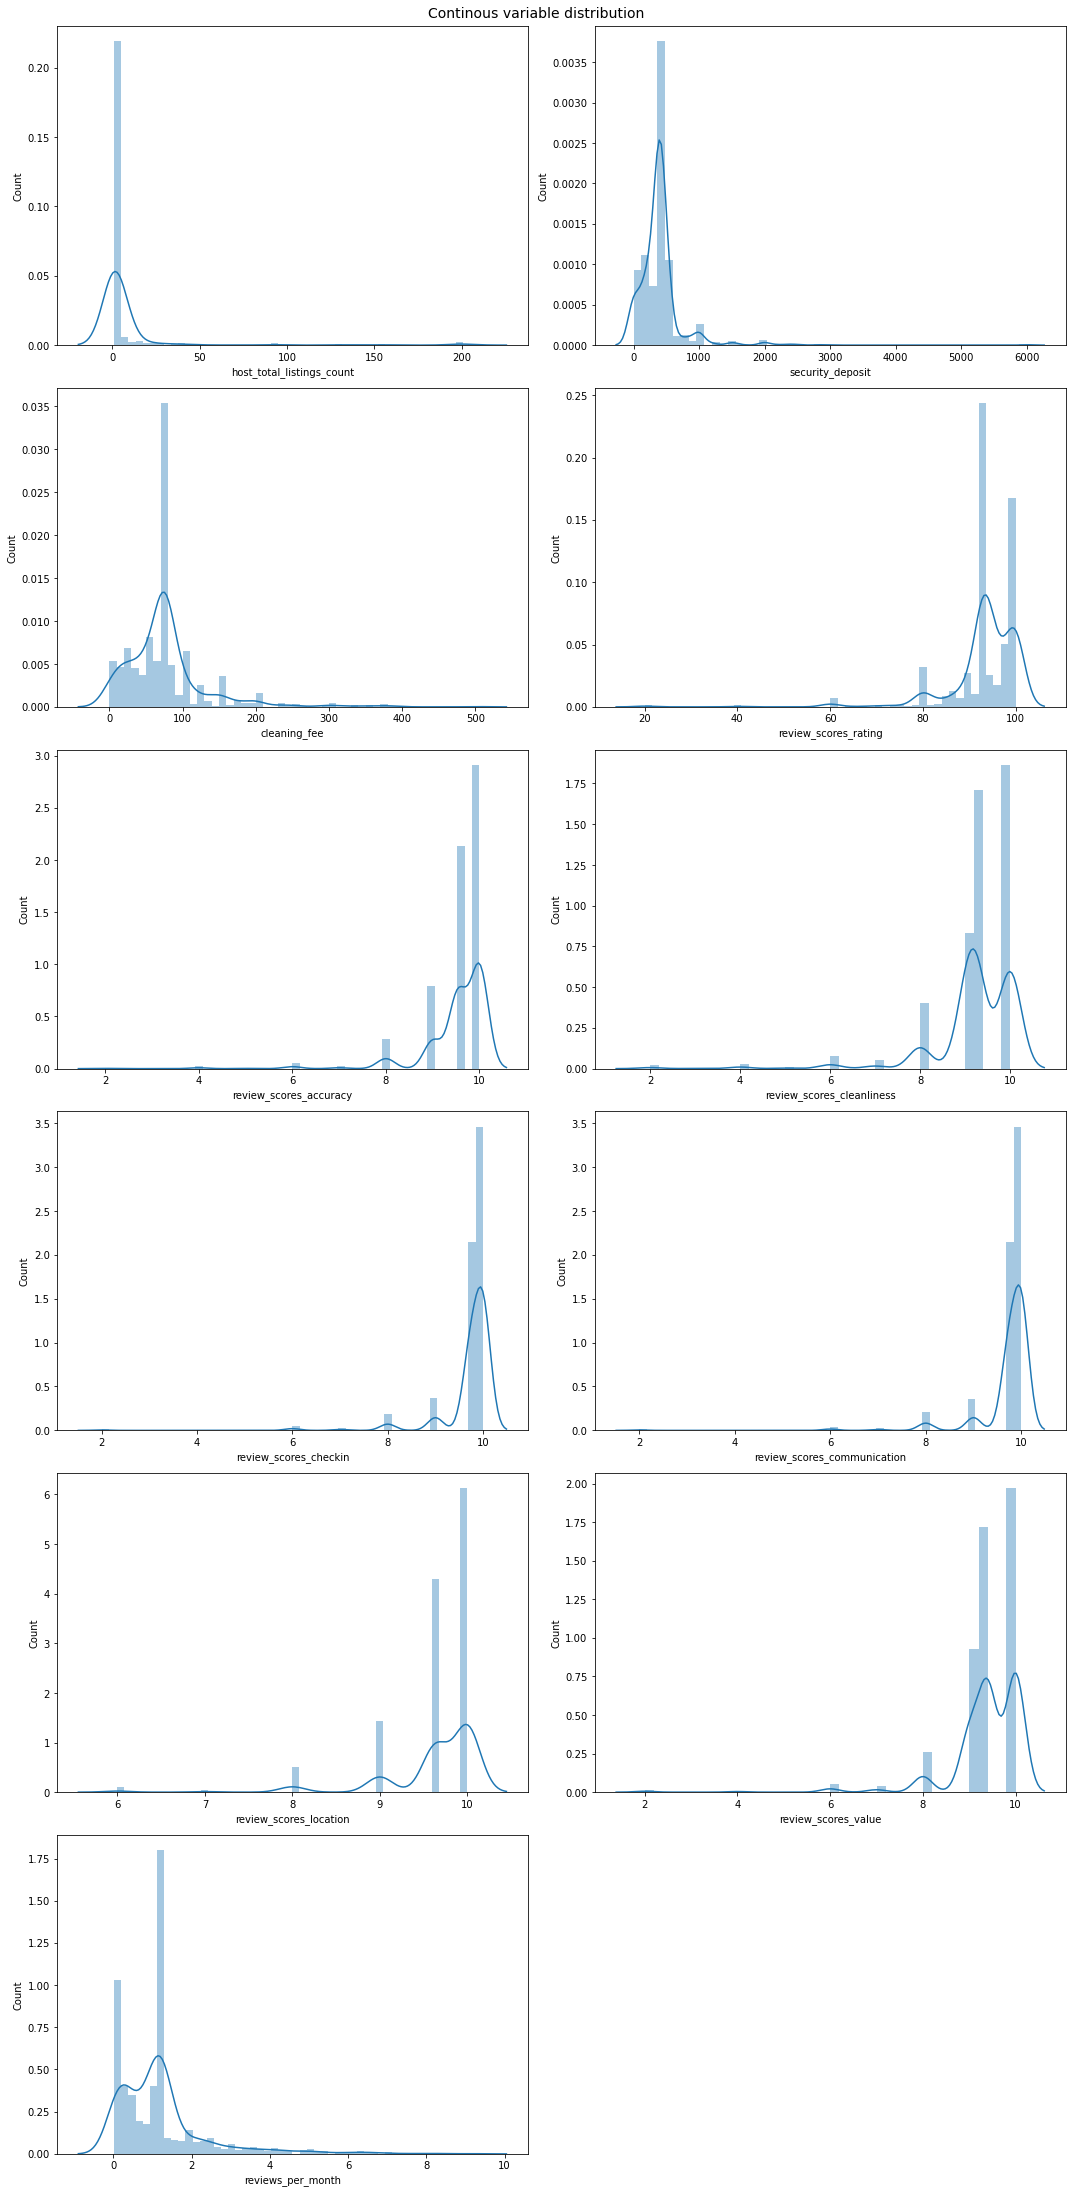

In [123]:
#Droping non required columns and plotting graphs for continous variables
plt.figure(figsize=(15,60))
n=1
columns = air_df.select_dtypes(('float64', 'int64')).drop(['Id','latitude','longitude'],axis=1)
for col in columns:
    if col!='price':
        plt.subplot(12,2,n)
        sns.distplot(air_df[col])
        plt.ylabel('Count')
        plt.tight_layout()
        n=n+1

plt.suptitle('Continous variable distribution',fontsize=14,y=1.002)
plt.show()


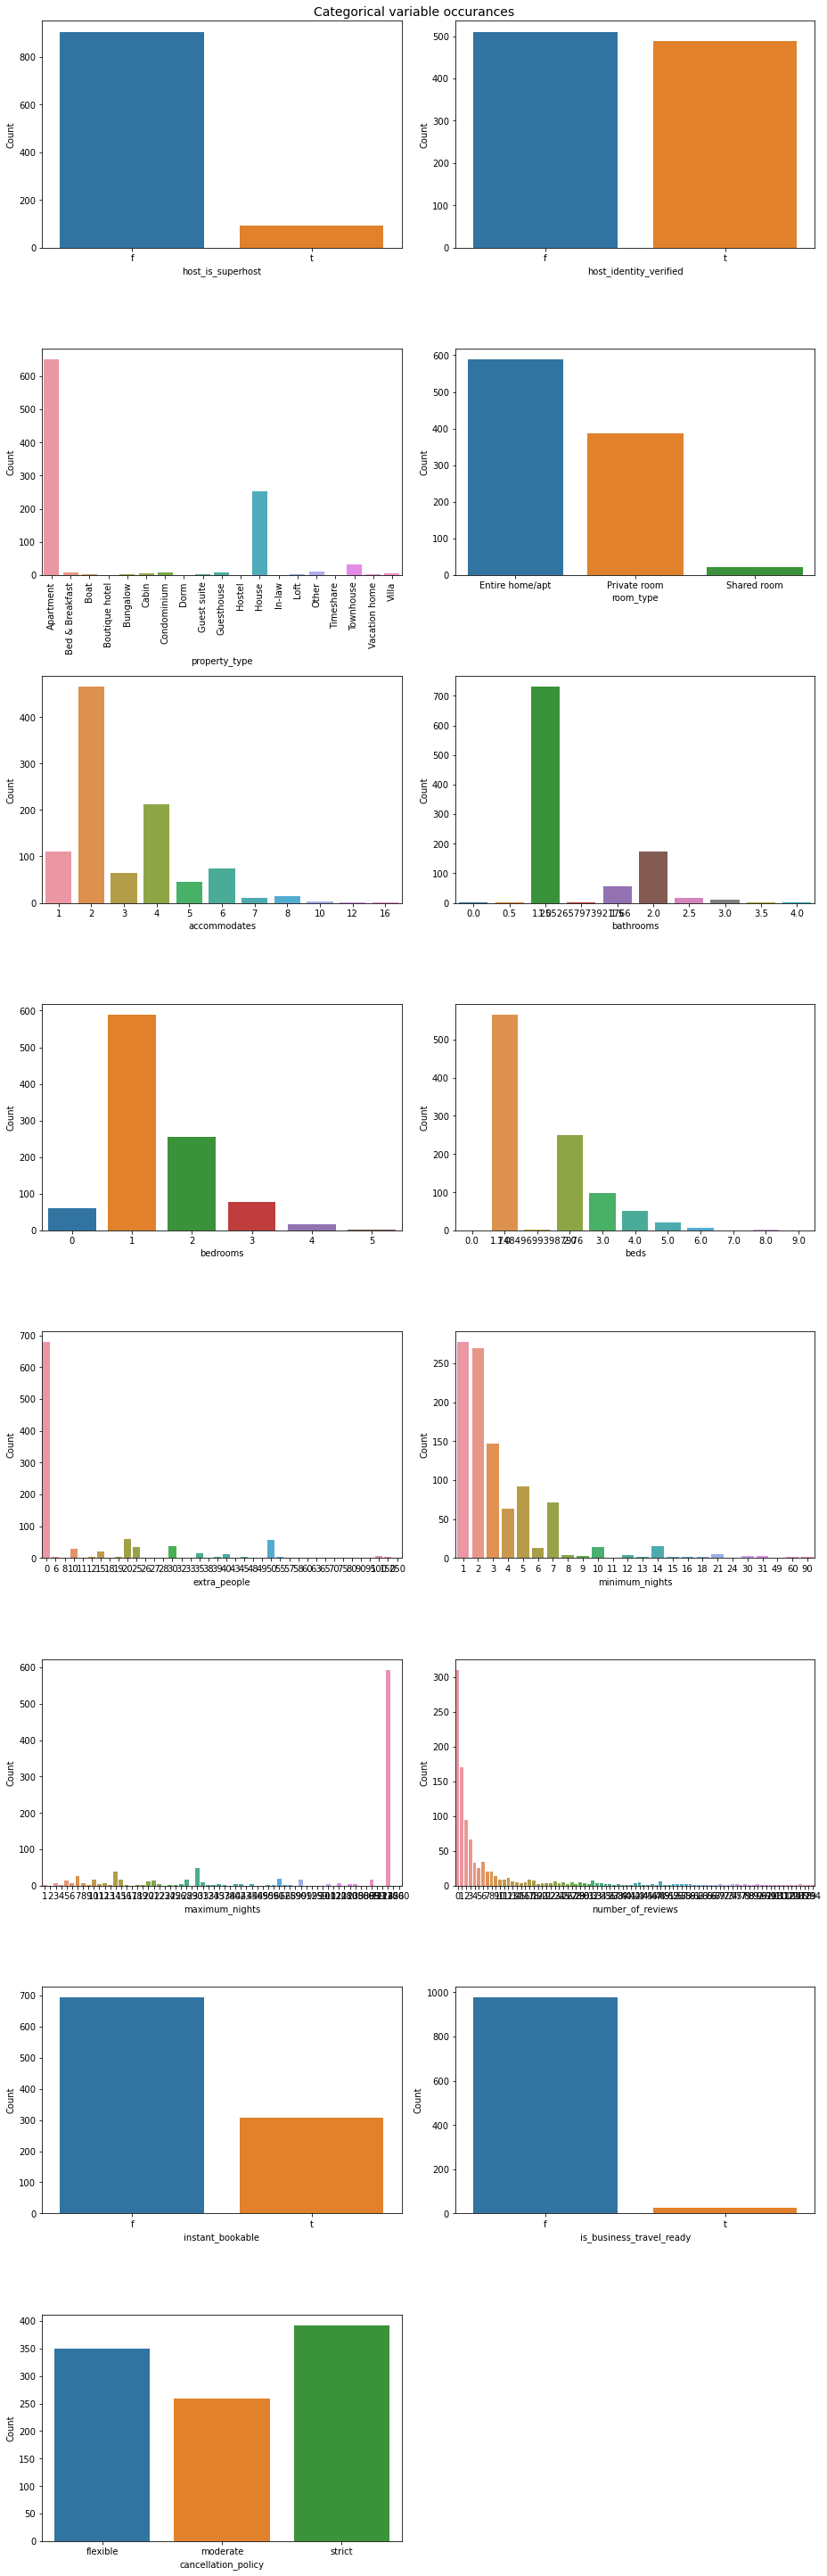

In [124]:
plt.figure(figsize=(13,40))
n=1
for col in air_df.select_dtypes('category'):
    plt.subplot(8,2,n)
    sns.countplot(x=col, data=air_df)
    plt.ylabel('Count')
    plt.tight_layout()
    n=n+1
    if col=='property_type':                   
         plt.xticks(rotation=90)

plt.suptitle('Categorical variable occurances',fontsize=14,y=1.002)
plt.show()

## Bi-variate Analysis¶

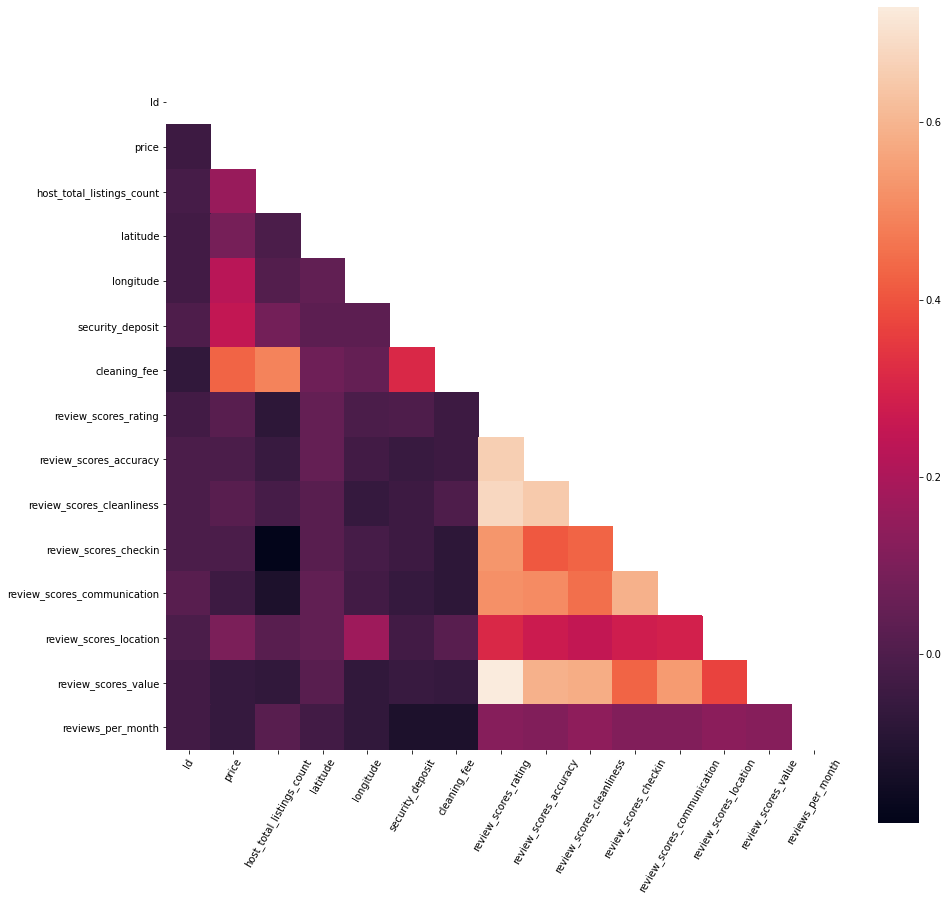

In [125]:
# Graphical representation of the correlation between variables using heatmap

plt.figure(figsize=(15,15))
corr=round(air_df.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, square=True, annot=False)
plt.xticks(rotation=60)
plt.show()


In [126]:
num_col=[]
correlation=[]
for x in air_df.select_dtypes(('float64', 'int64')):
    if x!='Id':
        if x!='price':
            corr=round(air_df['price'].corr(air_df[x]),2)
            correlation.append(corr)
            num_col.append(x)
    

In [127]:
corr_table=pd.DataFrame({'columns': num_col, 'correlation':correlation})
corr_table.sort_values(by='correlation', ascending=False)

,columns,correlation
4,cleaning_fee,0.43
3,security_deposit,0.25
2,longitude,0.23
0,host_total_listings_count,0.16
10,review_scores_location,0.10
1,latitude,0.09
5,review_scores_rating,0.02
7,review_scores_cleanliness,0.02
6,review_scores_accuracy,-0.01
8,review_scores_checkin,-0.01


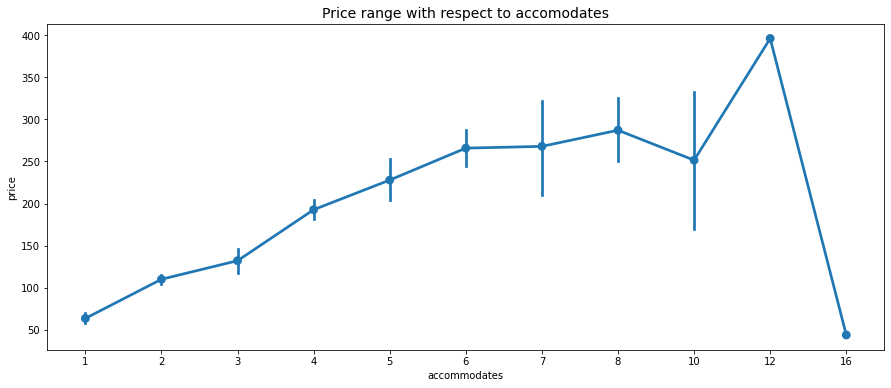

In [128]:
#Check price with respect to accommodates

plt.figure(figsize=(15,6))
sns.pointplot(x='accommodates', y='price', data=air_df)
plt.title('Price range with respect to accomodates',fontsize=14)
plt.show()

In [129]:
#We see a gradual increase in price as the no. of accommodates increases, but there is dip in price when the accomodates are 10 and 16. lets check why is there a price such a steep drop for 16 accommodates

In [130]:
sixteen_acc=air_df[air_df['accommodates']==16]
sixteen_acc

#16 accommodates:  it’s a house with a single bedroom, 3 bathrooms and 8 beds 
#which is supposed to be shared hence there is fall in the price for 16 accommodates. 
#Since there is only 1 record of this sort there is no saying this will actually help our model predict the prices better.


,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
429,429,44,f,3.0,f,-33.890913,151.23726,House,Shared room,16,...,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,f,f,flexible,1.203745


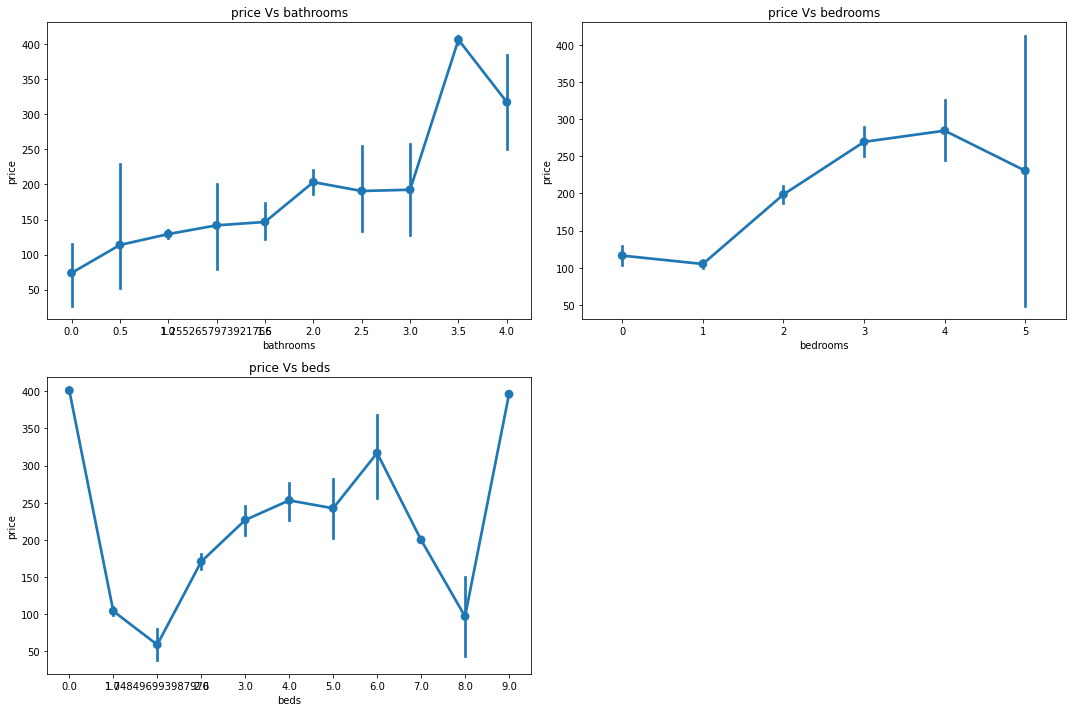

In [131]:
b_group=['bathrooms', 'bedrooms', 'beds']
plt.figure(figsize=(15,10))
n=1
for var in b_group:
    plt.subplot(2,2,n)
    sns.pointplot(x=var, y='price', data=air_df)
    n=n+1
    plt.title('price Vs ' + var)
    plt.tight_layout()
plt.show()


In [132]:
#Price increases with increase in the no. of bedrooms and bathrooms. 
#Beds: price of bed increase gradually when from 1 bed to 6 beds, 7 and 8 beds price slows down
#where as the price of 0 bed and 9 beds are quite high,

print('# records 8 beds: {}, 9 beds: {}'.format(len(air_df[air_df['beds']==8]),len(air_df[air_df['beds']==9])))

# records 8 beds: 2, 9 beds: 1


In [133]:
#checking why beds =0 and = 9  has high price, we noticed that in room type it is mentioned 
#as Entire house is available so it has highest price
list = [0,9]
air_df[air_df['beds'].isin(list)]

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
419,419,396,f,3.0,f,-33.882857,151.211357,Vacation home,Entire home/apt,12,...,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,t,f,strict,1.203745
754,754,401,f,91.0,t,-33.886414,151.238603,House,Entire home/apt,6,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,strict,0.480000


In [134]:
#records for 8 beds belongs to shared rooms and hence a price dip
air_df[air_df['beds']==8]

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
429,429,44,f,3.0,f,-33.890913,151.237260,House,Shared room,16,...,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,f,f,flexible,1.203745
800,800,150,f,1.0,f,-33.741807,151.123394,House,Entire home/apt,8,...,6.000000,8.000000,10.000000,8.000000,10.000000,8.00000,t,f,moderate,0.150000


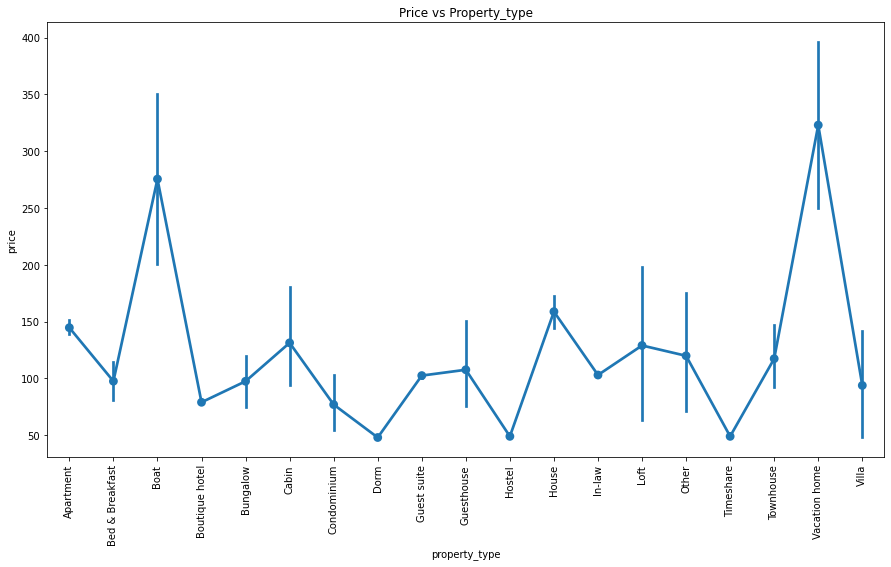

In [135]:
#we plot graph of property type versus price

#here we can see thatWe can see the properties like boat and vacation homes have expensive stays,
#where as hostel and timeshare have very economical stays
plt.figure(figsize=(15,8))
plt.title('Price vs Property_type')
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


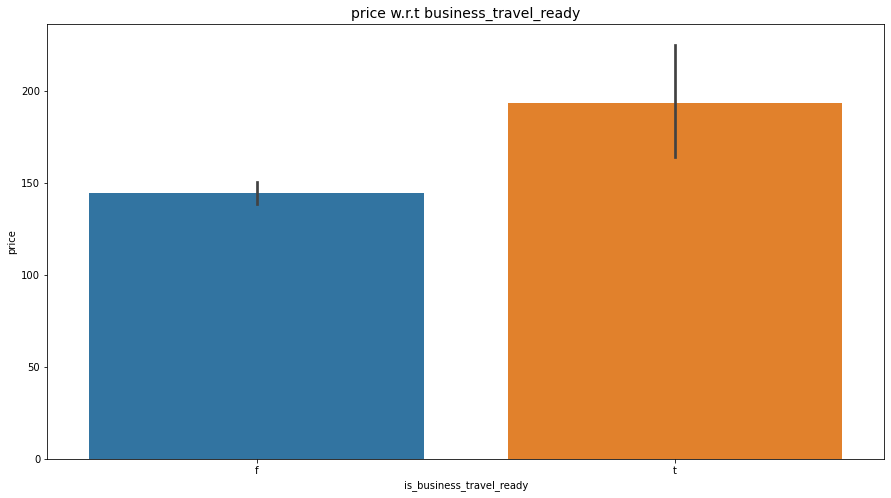

In [136]:
#From below graph we can infer that the price for business purpose stay is higher.
plt.figure(figsize=(15,8))
sns.barplot(x='is_business_travel_ready', y='price', data=air_df)
plt.title('price w.r.t business_travel_ready',fontsize=14)
plt.show()

C:\Users\Turvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


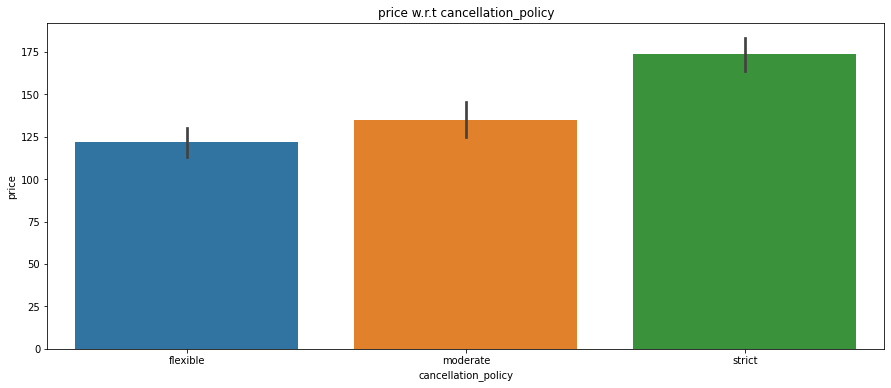

In [137]:
#Graph for cancellation policy
plt.figure(figsize=(15,6))
sns.barplot(air_df['cancellation_policy'],air_df['price'])
plt.title('price w.r.t cancellation_policy')
plt.show()

## Feature -Engineering

In [138]:
# First lets sort categorical variable property_type 
air_df['property_type'].value_counts()


Apartment          651
House              254
Townhouse           32
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Cabin                6
Villa                6
Loft                 3
Guest suite          2
Bungalow             2
Boat                 2
Vacation home        2
Dorm                 1
Hostel               1
In-law               1
Boutique hotel       1
Timeshare            1
Name: property_type, dtype: int64

In [139]:
n=air_df['property_type'].value_counts().index[:2]        
air_df['property_type']=air_df.property_type.where(air_df.property_type.isin(n),'other')
air_df['property_type'].value_counts()


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [140]:
air_df.isnull().sum()

Id                             0
price                          0
host_is_superhost              0
host_total_listings_count      0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
security_deposit               0
cleaning_fee                   0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
reviews_per_month              0
dtype: int

In [141]:
numeric_col=[]
for col in air_df.select_dtypes(('float64', 'int64')): 
    numeric_col.append(col)

In [142]:
numeric_col.remove('latitude')
numeric_col.remove('longitude')
numeric_col

['Id',
 'price',
 'host_total_listings_count',
 'security_deposit',
 'cleaning_fee',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [143]:
numeric=air_df.loc[:,numeric_col]
nums=np.round(MinMaxScaler().fit_transform(numeric),2)
numeric=pd.DataFrame(nums,columns=numeric_col)
numeric.shape

(1000, 13)

In [9]:
le=LabelEncoder()
cat_col=[]
for col in air_df.select_dtypes('category'):    
    cat_col.append(col)

cat=air_df.loc[:,cat_col]
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col].astype('str'))
    
cat.shape


(1000, 0)

In [145]:
Air_Df=pd.concat([numeric,cat], axis=1)
Air_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1000 non-null   float64
 1   price                        1000 non-null   float64
 2   host_total_listings_count    1000 non-null   float64
 3   security_deposit             1000 non-null   float64
 4   cleaning_fee                 1000 non-null   float64
 5   review_scores_rating         1000 non-null   float64
 6   review_scores_accuracy       1000 non-null   float64
 7   review_scores_cleanliness    1000 non-null   float64
 8   review_scores_checkin        1000 non-null   float64
 9   review_scores_communication  1000 non-null   float64
 10  review_scores_location       1000 non-null   float64
 11  review_scores_value          1000 non-null   float64
 12  reviews_per_month            1000 non-null   float64
 13  host_is_superhost  

## Modeling

In [146]:
#Now lets split the data set into train and test.
x=Air_Df.drop('price',axis=1)
y=Air_Df['price']                        

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [147]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 27)
(200, 27)
(800,)
(200,)


In [148]:
rmse_linear_regression = LinearRegression()
rmse_linear_regression.fit(x_train,y_train)
pred = rmse_linear_regression.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('Linear Regression RMSE: ',math.sqrt(rmse))

Linear Regression RMSE:  0.15202514050759


In [149]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)


R_squared: 0.5060770092930424


##### The RMSE is certainly good but the R_squared isn't quite so we will check further


## Deccision Tree


In [150]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=3)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('Decision Tree RMSE: ',math.sqrt(rmse))

Decision Tree RMSE:  0.18113301391754189


In [151]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.2988294904304434


##### The R squared reduced from existing 50% to 28%. Turns out Decision tree performed worse than Linear Regression

## RandomForest

In [154]:
rand = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_depth=20)
rand.fit(x_train,y_train)
pred=rand.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('RandomForest RMSE: ',math.sqrt(rmse))

RandomForest RMSE:  0.14983088676214817


In [155]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.5202321801301244


## Lasso regression


In [157]:
lasso = LassoCV()
lasso.fit(x_train,y_train)
pred = lasso.predict(x_test)
rmse = metrics.mean_squared_error(y_test,pred)
print('Lasso regression RMSE: ',math.sqrt(rmse))

Lasso regression RMSE:  0.15450813585239423


In [158]:
r_sq=metrics.r2_score(y_test,pred)
print('R_squared:',r_sq)

R_squared: 0.48981096512107836
